# Eigenvalues of a BCCB matrix

This notebook illustrates how to compute the eigenvalues of a Block Circulant matrix formed by Circulant Blocks (BCCB) that embeds a Block Toeplitz matrix formed by Toeplitz Blocks (BTTB).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.testing import assert_almost_equal as aae
from numpy.testing import assert_equal as ae

In [2]:
from gravmag import convolve as cv

In [3]:
def plot_matrices(BTTB):
    
    nblocks = BTTB['nblocks']
    n_points_per_block = BTTB["columns"].shape[1]
    BTTB_full = cv.generic_BTTB(BTTB=BTTB)
    BCCB_full = cv.embedding_BCCB(BTTB, full=True)
    
    min_value = -np.max(np.abs(BTTB_full))
    max_value = -min_value

    plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    
    plt.subplot(121)
    plt.title('BTTB', fontsize=18)
    plt.matshow(BTTB_full, fignum=False, vmin = min_value, vmax = max_value, cmap='seismic')
    plt.colorbar()
    plt.xticks(ticks=np.arange(nblocks)*n_points_per_block - 0.5, labels=[])
    plt.yticks(ticks=np.arange(nblocks)*n_points_per_block - 0.5, labels=[])
    plt.grid(color='k', linewidth=2)
    
    plt.subplot(122)
    plt.title('BCCB', fontsize=18)
    plt.matshow(BCCB_full, fignum=False, vmin = min_value, vmax = max_value, cmap='seismic')
    plt.colorbar()
    plt.xticks(ticks=np.arange(2*nblocks)*(2*n_points_per_block) - 0.5, labels=[])
    plt.yticks(ticks=np.arange(2*nblocks)*(2*n_points_per_block) - 0.5, labels=[])
    plt.grid(color='k', linewidth=2)
    
    plt.tight_layout()
    
    plt.show()

### symm-symm

In [4]:
# define the data structure for the generating BTTB matrix
BTTB = {
    "symmetry_structure": "symm",
    "symmetry_blocks": "symm",
    "nblocks": 2,
    "columns": np.array(
        [
            [1, -2, 3],
            [10, 20, -30],
        ]
    ),
    "rows": None,
}

BTTB_matrix = cv.generic_BTTB(BTTB=BTTB)
# define the data structure for the generating BTTB matrix transposed
BTTB_T = {
    "symmetry_structure": "symm",
    "symmetry_blocks": "symm",
    "nblocks": 2,
    "columns": np.array(
        [
            [1, -2, 3],
            [10, 20, -30],
        ]
    ),
    "rows": None,
}
BTTB_matrix_T = cv.generic_BTTB(BTTB=BTTB_T)

In [5]:
# compare BTTB matrices
ae(BTTB_matrix.T, BTTB_matrix_T)

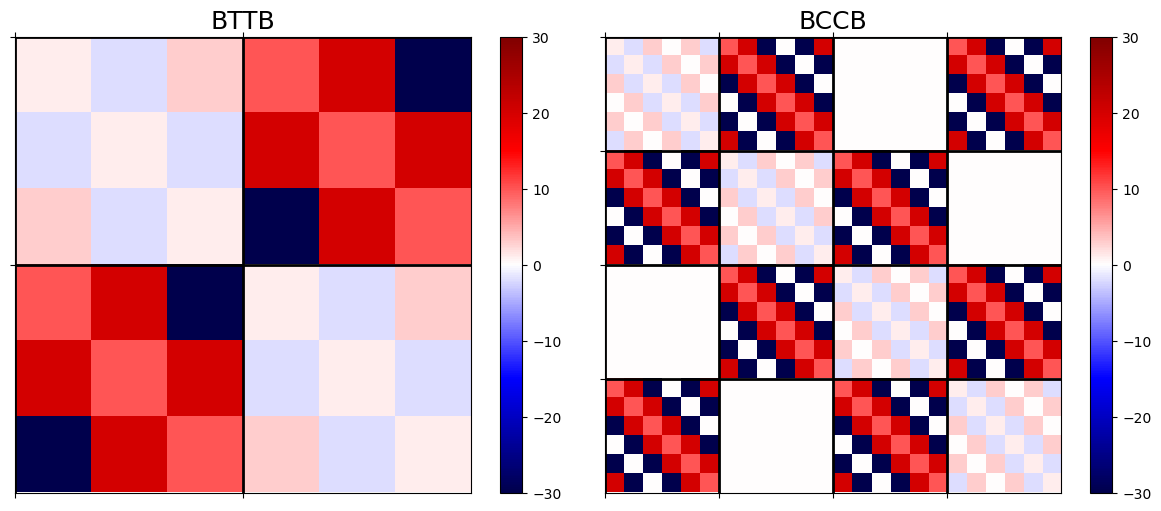

In [6]:
plot_matrices(BTTB)

In [7]:
# compute the eigenvalues
L = cv.eigenvalues_BCCB(BTTB=BTTB, ordering="row")
L_T = cv.eigenvalues_BCCB(BTTB=BTTB_T, ordering="row")

In [8]:
# compare eigenvalues
aae(np.conj(L), L_T, decimal=12)

### symm-skew

In [9]:
# define the data structure for the generating BTTB matrix
BTTB = {
    "symmetry_structure": "symm",
    "symmetry_blocks": "skew",
    "nblocks": 2,
    "columns": np.array(
        [
            [1, 2, 3],
            [10, 20, 30],
        ]
    ),
    "rows": None,
}
BTTB_matrix = cv.generic_BTTB(BTTB=BTTB)
# define the data structure for the generating BTTB matrix transposed
BTTB_T = {
    "symmetry_structure": "symm",
    "symmetry_blocks": "skew",
    "nblocks": 2,
    "columns": np.array(
        [
            [1, -2, -3],
            [10, -20, -30],
        ]
    ),
    "rows": None,
}
BTTB_matrix_T = cv.generic_BTTB(BTTB=BTTB_T)

In [10]:
# compare BTTB matrices
ae(BTTB_matrix.T, BTTB_matrix_T)

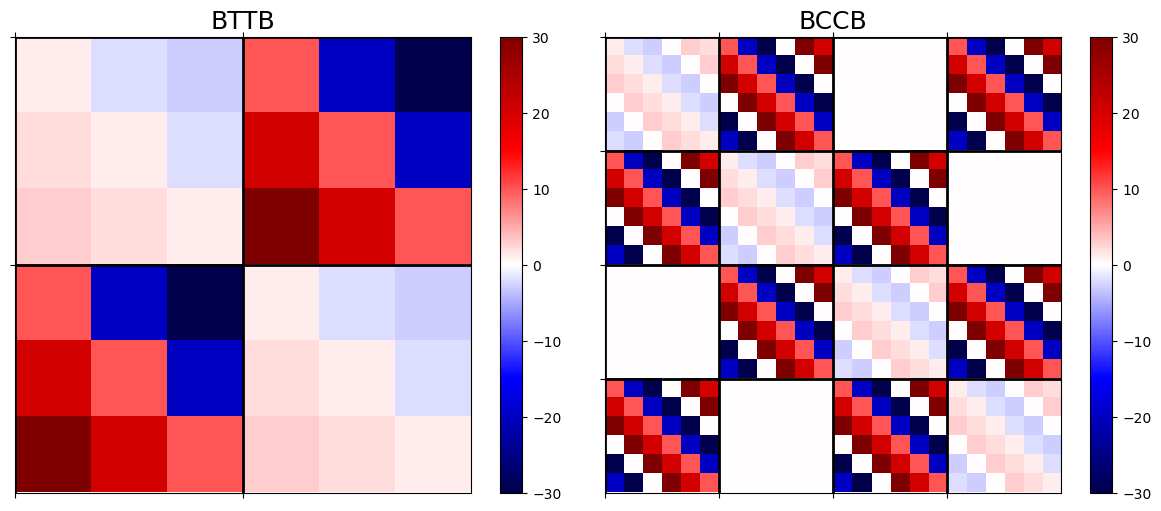

In [11]:
plot_matrices(BTTB)

In [12]:
# compute the eigenvalues
L = cv.eigenvalues_BCCB(BTTB=BTTB, ordering="row")
L_T = cv.eigenvalues_BCCB(BTTB=BTTB_T, ordering="row")

In [13]:
# compare eigenvalues
aae(np.conj(L), L_T, decimal=12)

### skew-symm

In [14]:
# define the data structure for the generating BTTB matrix
BTTB = {
    "symmetry_structure": "skew",
    "symmetry_blocks": "symm",
    "nblocks": 2,
    "columns": np.array(
        [
            [1, 2, 3],
            [10, 20, 30],
        ]
    ),
    "rows": None,
}
BTTB_matrix = cv.generic_BTTB(BTTB=BTTB)
# define the data structure for the generating BTTB matrix transposed
BTTB_T = {
    "symmetry_structure": "skew",
    "symmetry_blocks": "symm",
    "nblocks": 2,
    "columns": np.array(
        [
            [1, 2, 3],
            [-10, -20, -30],
        ]
    ),
    "rows": None,
}
BTTB_matrix_T = cv.generic_BTTB(BTTB=BTTB_T)

In [15]:
# compare BTTB matrices
ae(BTTB_matrix.T, BTTB_matrix_T)

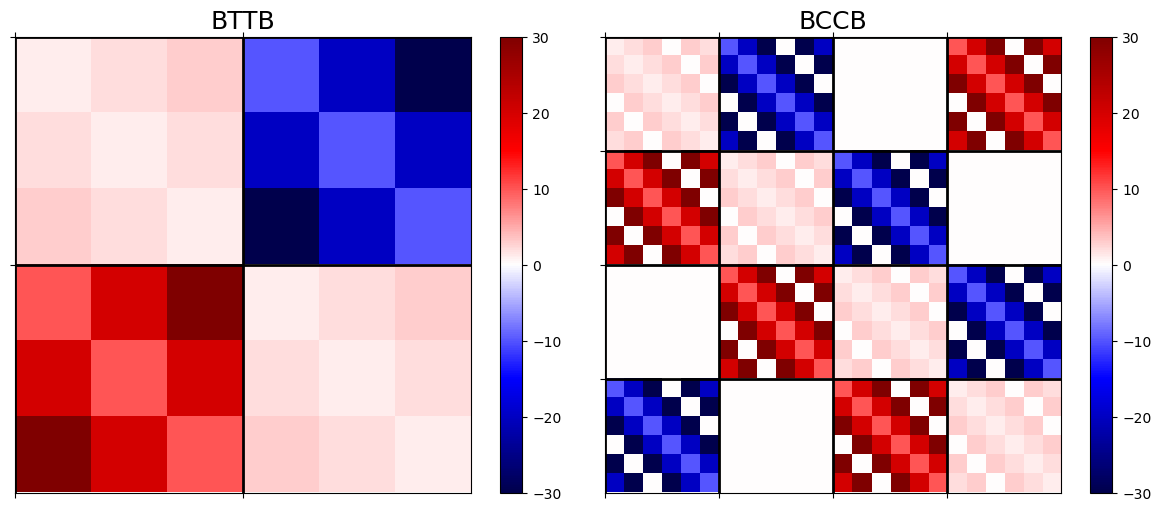

In [16]:
plot_matrices(BTTB)

In [17]:
# compute the eigenvalues
L = cv.eigenvalues_BCCB(BTTB=BTTB, ordering="row")
L_T = cv.eigenvalues_BCCB(BTTB=BTTB_T, ordering="row")

In [18]:
# compare eigenvalues
aae(np.conj(L), L_T, decimal=12)

### skew-skew

In [19]:
# define the data structure for the generating BTTB matrix
BTTB = {
    "symmetry_structure": "skew",
    "symmetry_blocks": "skew",
    "nblocks": 2,
    "columns": np.array(
        [
            [1, 2, 3],
            [10, 20, 30],
        ]
    ),
    "rows": None,
}
BTTB_matrix = cv.generic_BTTB(BTTB=BTTB)
# define the data structure for the generating BTTB matrix transposed
BTTB_T = {
    "symmetry_structure": "skew",
    "symmetry_blocks": "skew",
    "nblocks": 2,
    "columns": np.array(
        [
            [1, -2, -3],
            [-10, 20, 30],
        ]
    ),
    "rows": None,
}
BTTB_matrix_T = cv.generic_BTTB(BTTB=BTTB_T)

In [20]:
# compare BTTB matrices
ae(BTTB_matrix.T, BTTB_matrix_T)

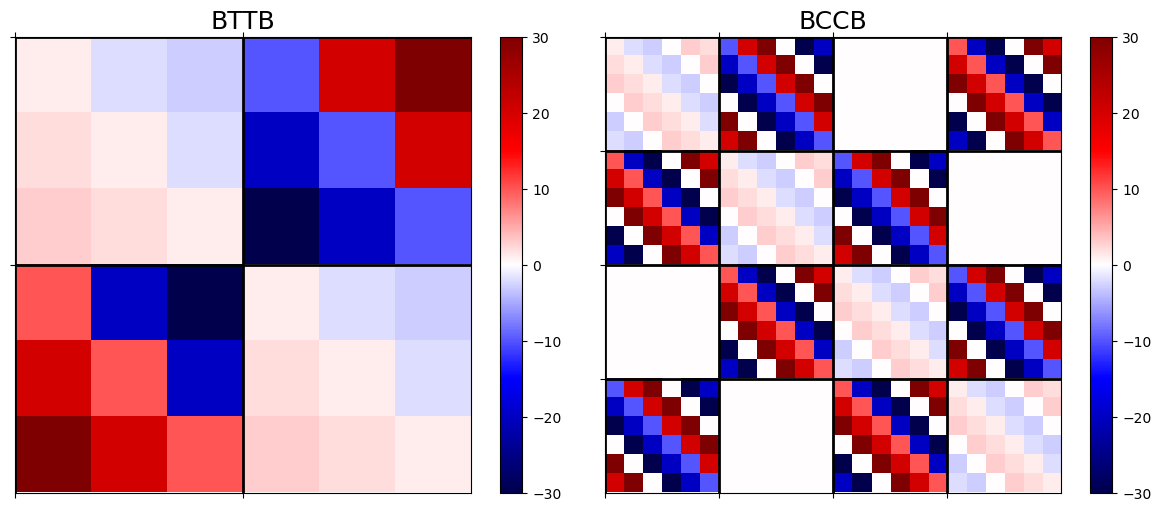

In [21]:
plot_matrices(BTTB)

In [22]:
# compute the eigenvalues
L = cv.eigenvalues_BCCB(BTTB=BTTB, ordering="row")
L_T = cv.eigenvalues_BCCB(BTTB=BTTB_T, ordering="row")

In [23]:
# compare eigenvalues
aae(np.conj(L), L_T, decimal=12)